# Example: Regression with `QNNRegressor`

In this example we show how to train the `QNNRegressor` to fit a logarithm. We will also use this demonstrator to show what happens if a QNN, that was trained on a noiseless simulator is executed on a noisy simulator.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevPQC
from squlearn.observables import IsingHamiltonian, SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import SLSQP, Adam, SPSA

We will use Qiskit's `StatevectorSimulator` for trainning.

In [2]:
executor = Executor("statevector_simulator")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


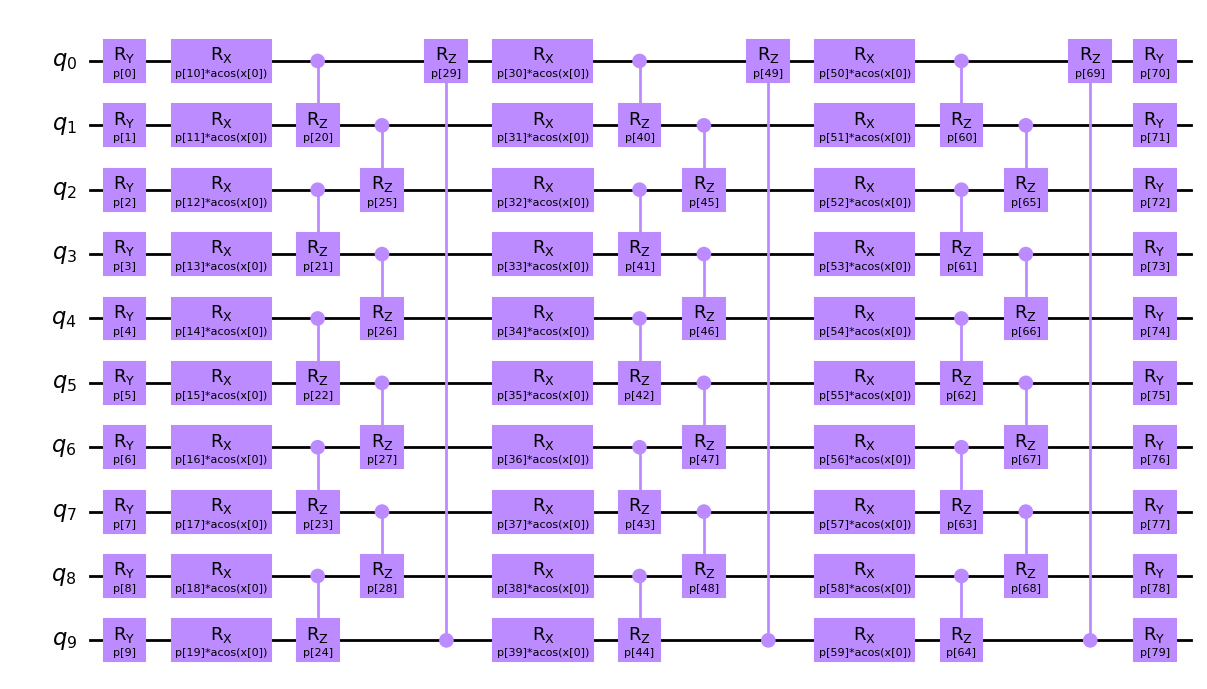

In [3]:
nqubits = 10
number_of_layers = 3

pqc = ChebyshevPQC(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

We also need an observable

In [4]:
ising_op = SummedPaulis(nqubits)#, I="S", Z="S", ZZ="S")
print(ising_op)

SparsePauliOp(['IIIIIIIIII', 'IIIIIIIIIZ', 'IIIIIIIIZI', 'IIIIIIIZII', 'IIIIIIZIII', 'IIIIIZIIII', 'IIIIZIIIII', 'IIIZIIIIII', 'IIZIIIIIII', 'IZIIIIIIII', 'ZIIIIIIIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4]), ParameterExpression(1.0*p[5]),
 ParameterExpression(1.0*p[6]), ParameterExpression(1.0*p[7]),
 ParameterExpression(1.0*p[8]), ParameterExpression(1.0*p[9]),
 ParameterExpression(1.0*p[10])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `SLSQP` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator.

In [5]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.random.rand(ising_op.num_parameters)

reg = QNNRegressor(pqc, ising_op, executor, SquaredLoss(), SLSQP(), param_ini, param_op_ini,variance=0.005)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_sing

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

fit: 100%|██████████| 100/100 [03:09<00:00,  1.78s/it]

## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg.param)
print("Result operator params:", reg.param_op)

Result PQC params: [ 0.6617104   0.32185253  0.25961737 -0.01213368  0.29405774  0.80177842
  0.13424626  0.11337419  0.30161252  1.68123487  0.20332897  0.28368769
  0.29184235  0.86963922  0.94284205 -0.01433661  0.78827207  0.07992419
 -0.71934799 -0.21584126  0.7435439   0.08767871  1.0439961   0.79464906
 -0.11514039  0.34288143  0.16171426  0.93513463 -0.67782648  0.38162228
  0.71273826  0.347597    1.09018598  0.4240561   1.24823383  1.20103669
 -0.5734962   0.81068209  0.30816673 -0.54349525  0.06466141  0.5536922
 -0.1459599  -0.15186101  0.14650787 -0.27383189  0.04592512  0.48598835
  0.63449222 -0.32355416  0.56863277  0.88139838 -0.02479536  0.11309327
  0.93201677  0.07143     1.449862    0.70660454  0.97162483 -0.15894818
  0.25723777 -0.01933373  2.78613203 -0.10517328 -0.11746903  0.16933137
 -0.20070256  3.11401891  1.83610073 -0.01812212  0.54931962  0.13550987
  0.39289323  0.17751874  0.28495264  1.28212554  0.03412245  0.61432293
  1.0833285   1.31312972]
Result 

Also let's plot the predicted function vs. the actual logarithm function

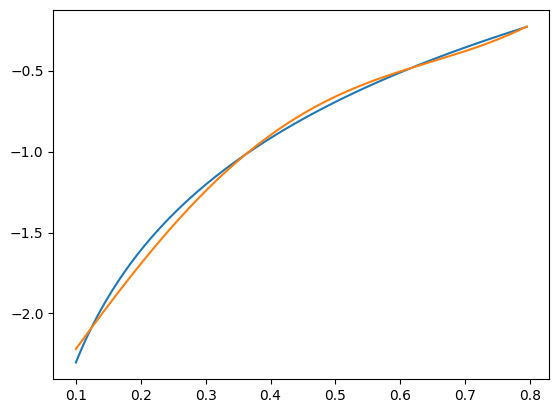

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

Let's also plot the error of the QNN.

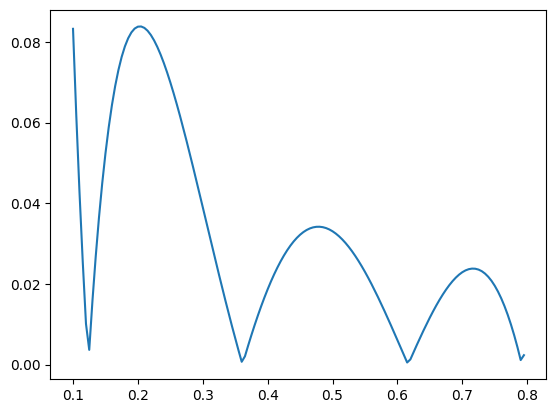

In [9]:
plt.plot(x, np.abs(y - np.log(x)))

## Evaluation on noisy simulator

Finally let's evaluate the trained `QNNRegressor` on Qiskit's `QasmSimulator`.

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_sing

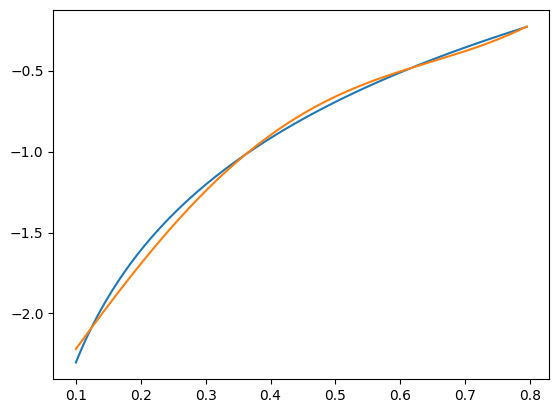

In [10]:
qasm = Executor("qasm_simulator")
qnn_qasm = QNNRegressor(pqc, ising_op, qasm, SquaredLoss, SLSQP(), reg.param, reg.param_op)
qnn_qasm._is_fitted = True
y = qnn_qasm.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

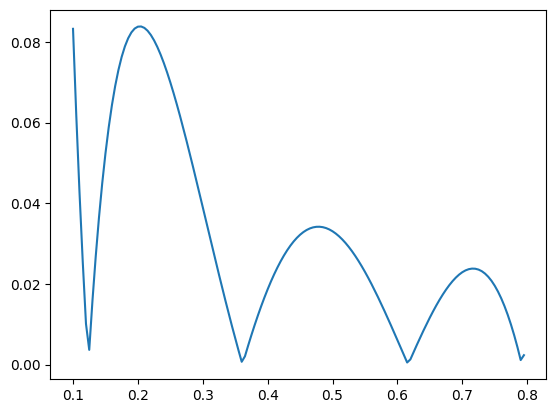

In [11]:
plt.plot(x, np.abs(y - np.log(x)))

We see, that the model is now subject to noise.